# Whats the problem and solution?

**Problem Statement:**

Develop a credit risk assessment model for a small community bank to evaluate loan applicants' creditworthiness using historical data.

Why it Needs to be Solved:

1.Risk Mitigation: The bank needs to minimize the risk of default to maintain a healthy loan portfolio and financial stability.

2.Efficient Decision Making: A reliable credit scoring system enables the bank to make quicker and more accurate decisions on loan approvals, improving operational efficiency.

3.Customer Satisfaction: By ensuring fair and transparent lending practices, the bank can enhance customer satisfaction and loyalty.

**Current Solution:**

The current solution involves leveraging Python scripting and various data analytics techniques to address key challenges in the banking sector:

1.Customer Segmentation (Clustering): Clustering algorithms are used to group customers based on their banking behaviors, transaction histories, and demographics. This helps banks better understand their customer base and tailor marketing strategies accordingly.

2.Credit Risk Assessment (Classification): Classification algorithms are employed to develop a robust credit scoring system for evaluating the creditworthiness of loan applicants. By analyzing historical data, banks can predict the likelihood of default or late payments and enhance risk management practices.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
# Data for performance of the Bank

per = pd.read_csv(r'C:\Users\igomp\OneDrive\Desktop\Projects_Data_scince\credit_project\Countries.csv')

# Data for clasifying customers based on diffrent demographics 

cluster = pd.read_csv(r'C:\Users\igomp\OneDrive\Desktop\Projects_Data_scince\credit_project\New folder\Loan_default.csv')
cluster.head(4)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0


In [3]:
#checking for issing values in %
df_missingpercent = round((cluster.isnull().sum()*100/len(cluster)).sort_values(ascending=False),2)
df_missingpercent

LoanID            0.0
Age               0.0
HasCoSigner       0.0
LoanPurpose       0.0
HasDependents     0.0
HasMortgage       0.0
MaritalStatus     0.0
EmploymentType    0.0
Education         0.0
DTIRatio          0.0
LoanTerm          0.0
InterestRate      0.0
NumCreditLines    0.0
MonthsEmployed    0.0
CreditScore       0.0
LoanAmount        0.0
Income            0.0
Default           0.0
dtype: float64

In [4]:
cluster.shape

(255347, 18)

# Features and data Availability

The available data consists of 255,347 records and includes the following features:

**Age:** The age of the individual applying for a loan.

**Income**: The income of the individual.

**LoanAmount**: The amount of the loan requested.

**CreditScore:** The credit score of the individual.

**MonthsEmployed:** The number of months the individual has been employed.

**NumCreditLines:** The number of credit lines the individual has.

**InterestRate:** The interest rate associated with the loan.

**LoanTerm:** The term (in months) of the loan.

**DTIRatio:** The debt-to-income ratio of the individual.

**Education:** The education level of the individual.

**EmploymentType:** The type of employment of the individual.

**MaritalStatus:** The marital status of the individual.

**HasMortgage:** Indicates whether the individual has a mortgage.

**HasDependents:** Indicates whether the individual has dependents.

**LoanPurpose:** The purpose of the loan.

**HasCoSigner:** Indicates whether the individual has a co-signer.

**Default:** Indicates whether the individual defaulted on the loan (target variable).



**Desirable but unavailable data might include:**

**Credit History:** Detailed credit history information such as payment history, outstanding debts, and credit utilization.

**Assets and Liabilities:** Information about the individual's assets and liabilities, providing a more comprehensive view of their financial situation.

**Employment Stability:** Data on the stability of the individual's employment, including job tenure and industry trends.

**Geographic Information:** Geographic location data could offer insights into regional economic conditions and demographic trends.



**Data that is available but not needed for the specific analysis could include:**

**HasMortgage:** While this feature could be relevant for certain analyses, if the focus is primarily on credit risk assessment and customer segmentation, mortgage status might not be as crucial.

**HasDependents:** Similarly, depending on the specific objectives of the analysis, information about dependents might not be directly relevant.

**Education:** While education level could be a factor in creditworthiness

**LoanPurpose:** Unless the purpose of the loan is a critical factor for segmentation or risk assessment, this feature might not be needed for the current analysis.


In [5]:
# univarient Analysis
cluster.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [6]:
cluster.dtypes

LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

In [7]:
cluster.columns.values

array(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'], dtype=object)

In [8]:
categorical_variables=['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 
                       'HasDependents', 'LoanPurpose','NumCreditLines', 'HasCoSigner', 'Default']


numerical_variables=['Age', 'Income', 'LoanAmount', 'CreditScore', 
                     'MonthsEmployed', 'InterestRate', 'LoanTerm', 'DTIRatio',]

In [9]:
for variable in categorical_variables:
    print(cluster[variable].value_counts())
    print("~"*50)

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
HasDependents
Yes    127742
No     127605
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
NumCreditLines
2    64130
3    63834
4    63829
1    63554
Name: count, dtype: i

# EDA

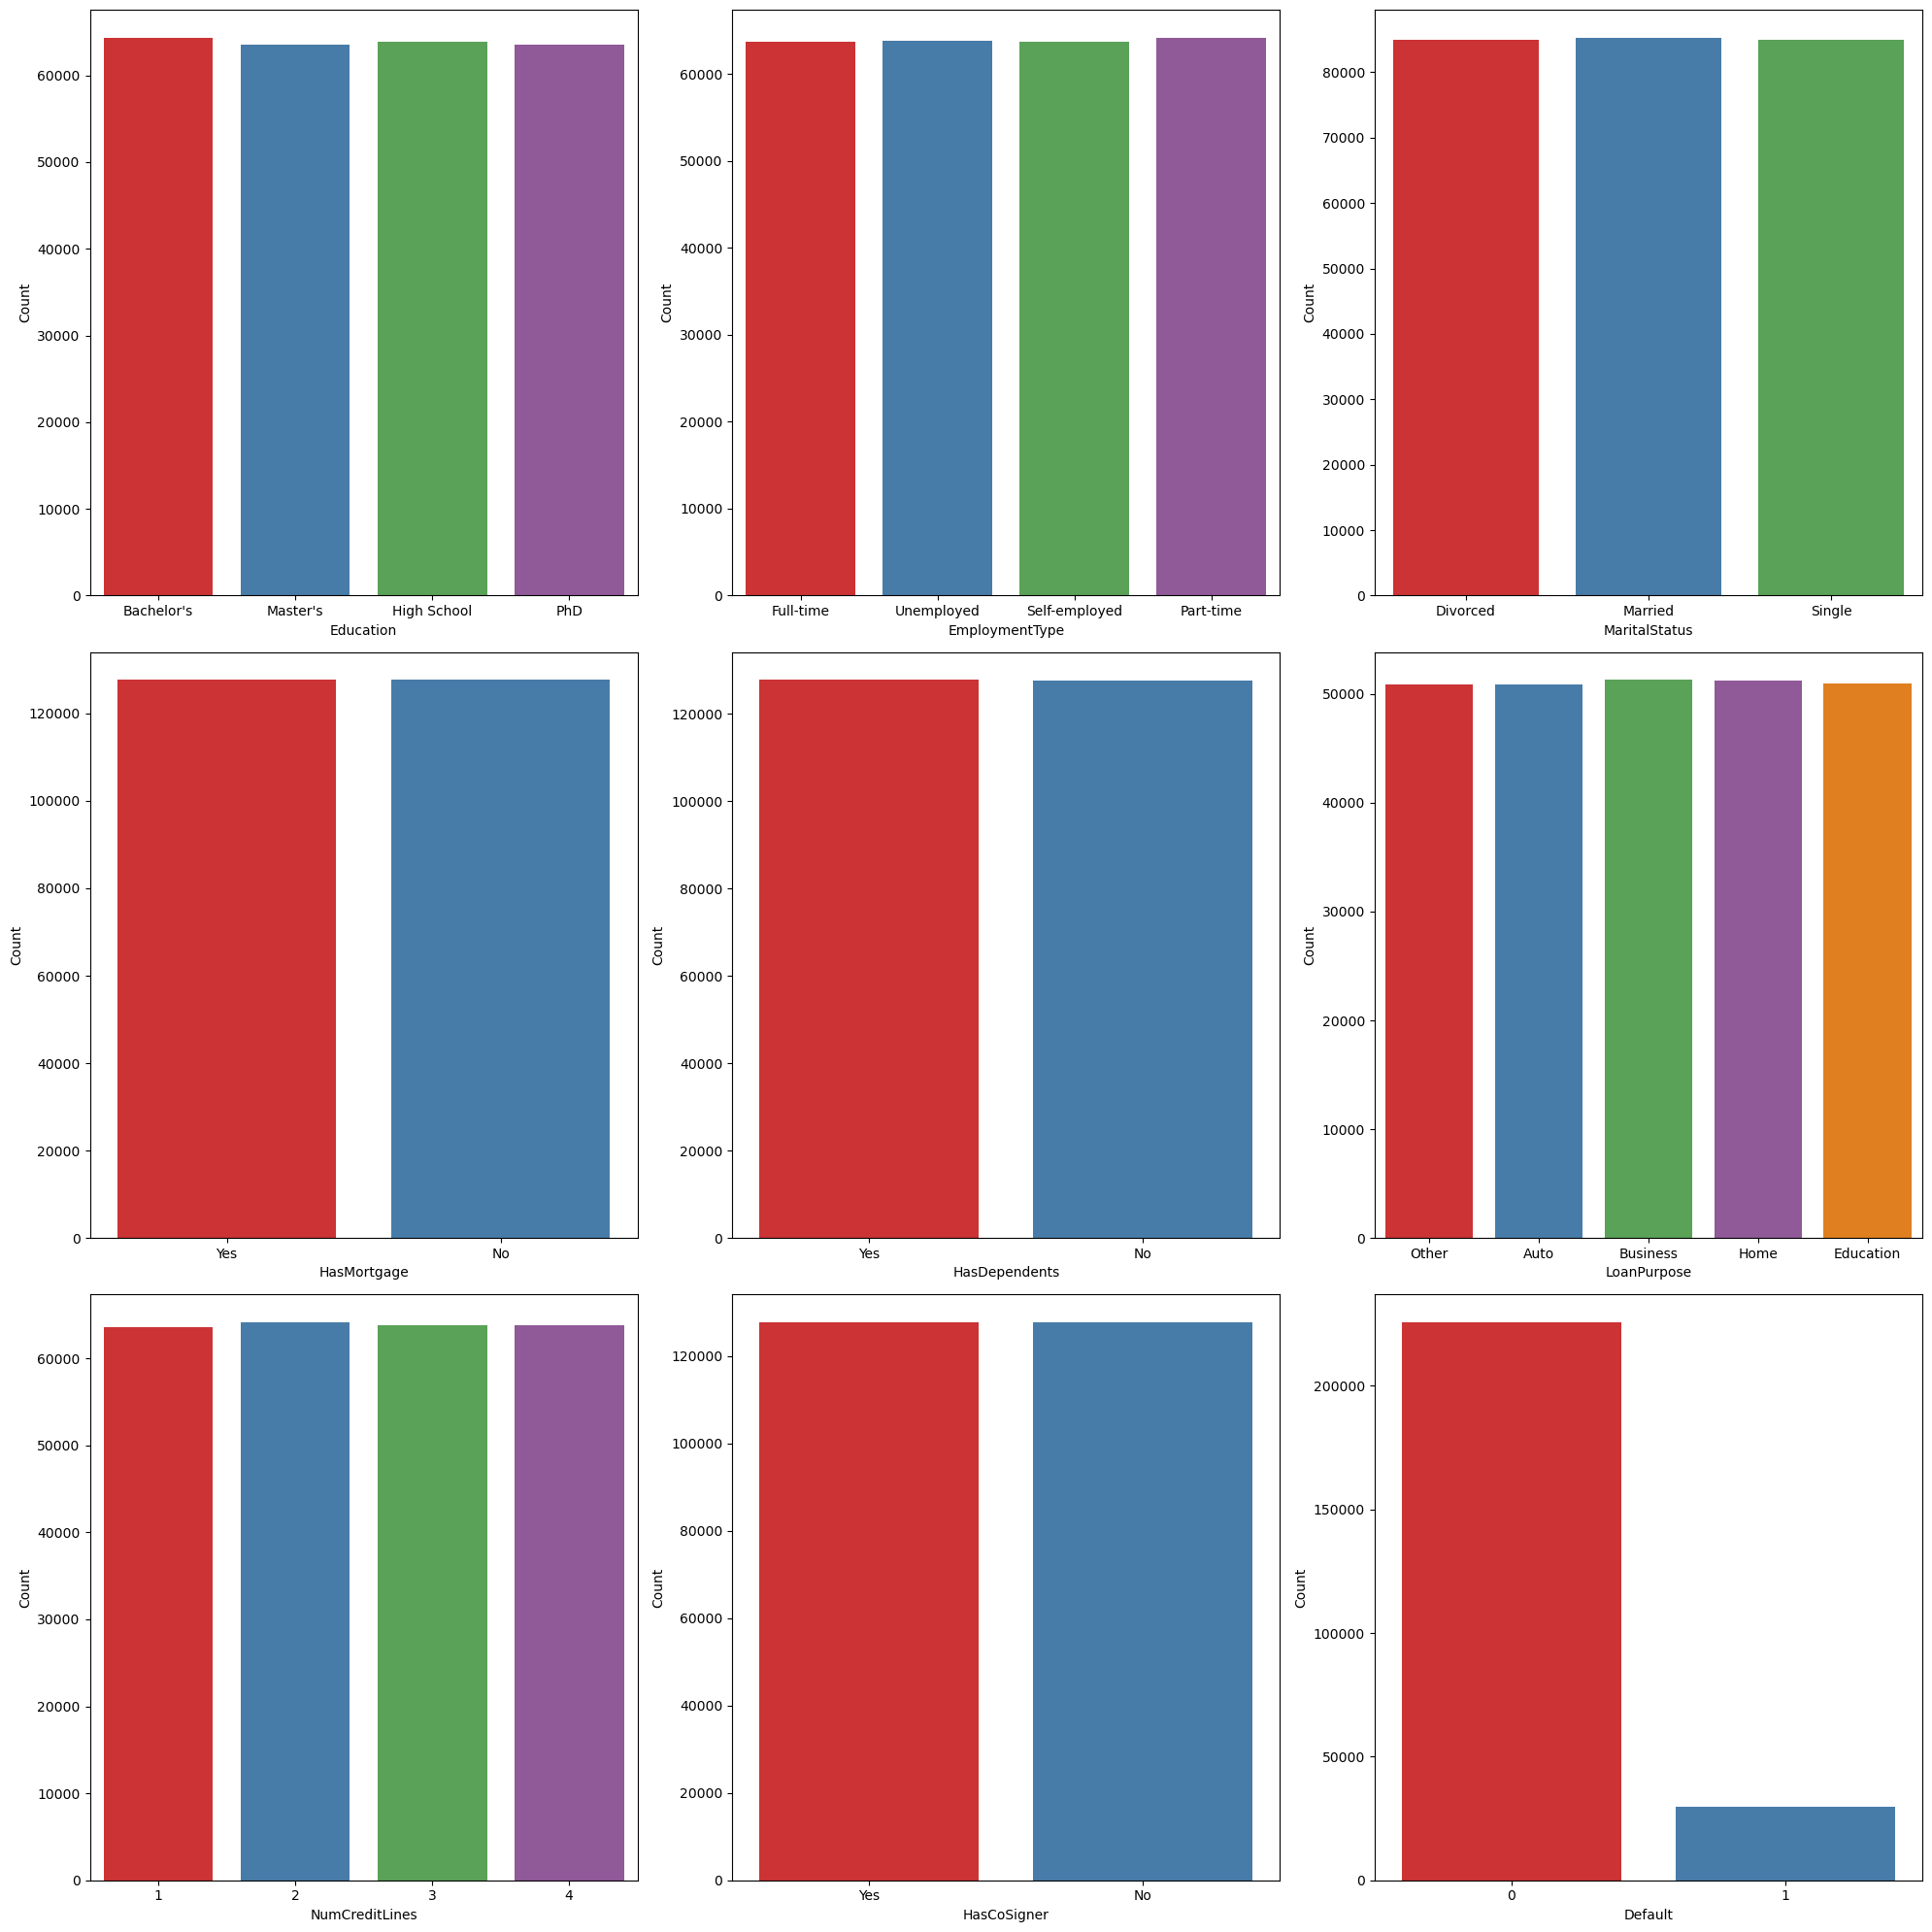

In [10]:
#Count of categories in each variable
plt.figure(figsize=(20, 20))
ind=1
for variable in categorical_variables:
    plt.subplot(3,3,ind)
    sns.countplot(x=cluster[variable],palette='Set1')
    plt.ylabel('Count')
    plt.xlabel(variable)
    ind+=1
plt.tight_layout()
plt.show()

# Summary:

we can see in the Defaulter that the non-defaulter data is more and is imbalanced 

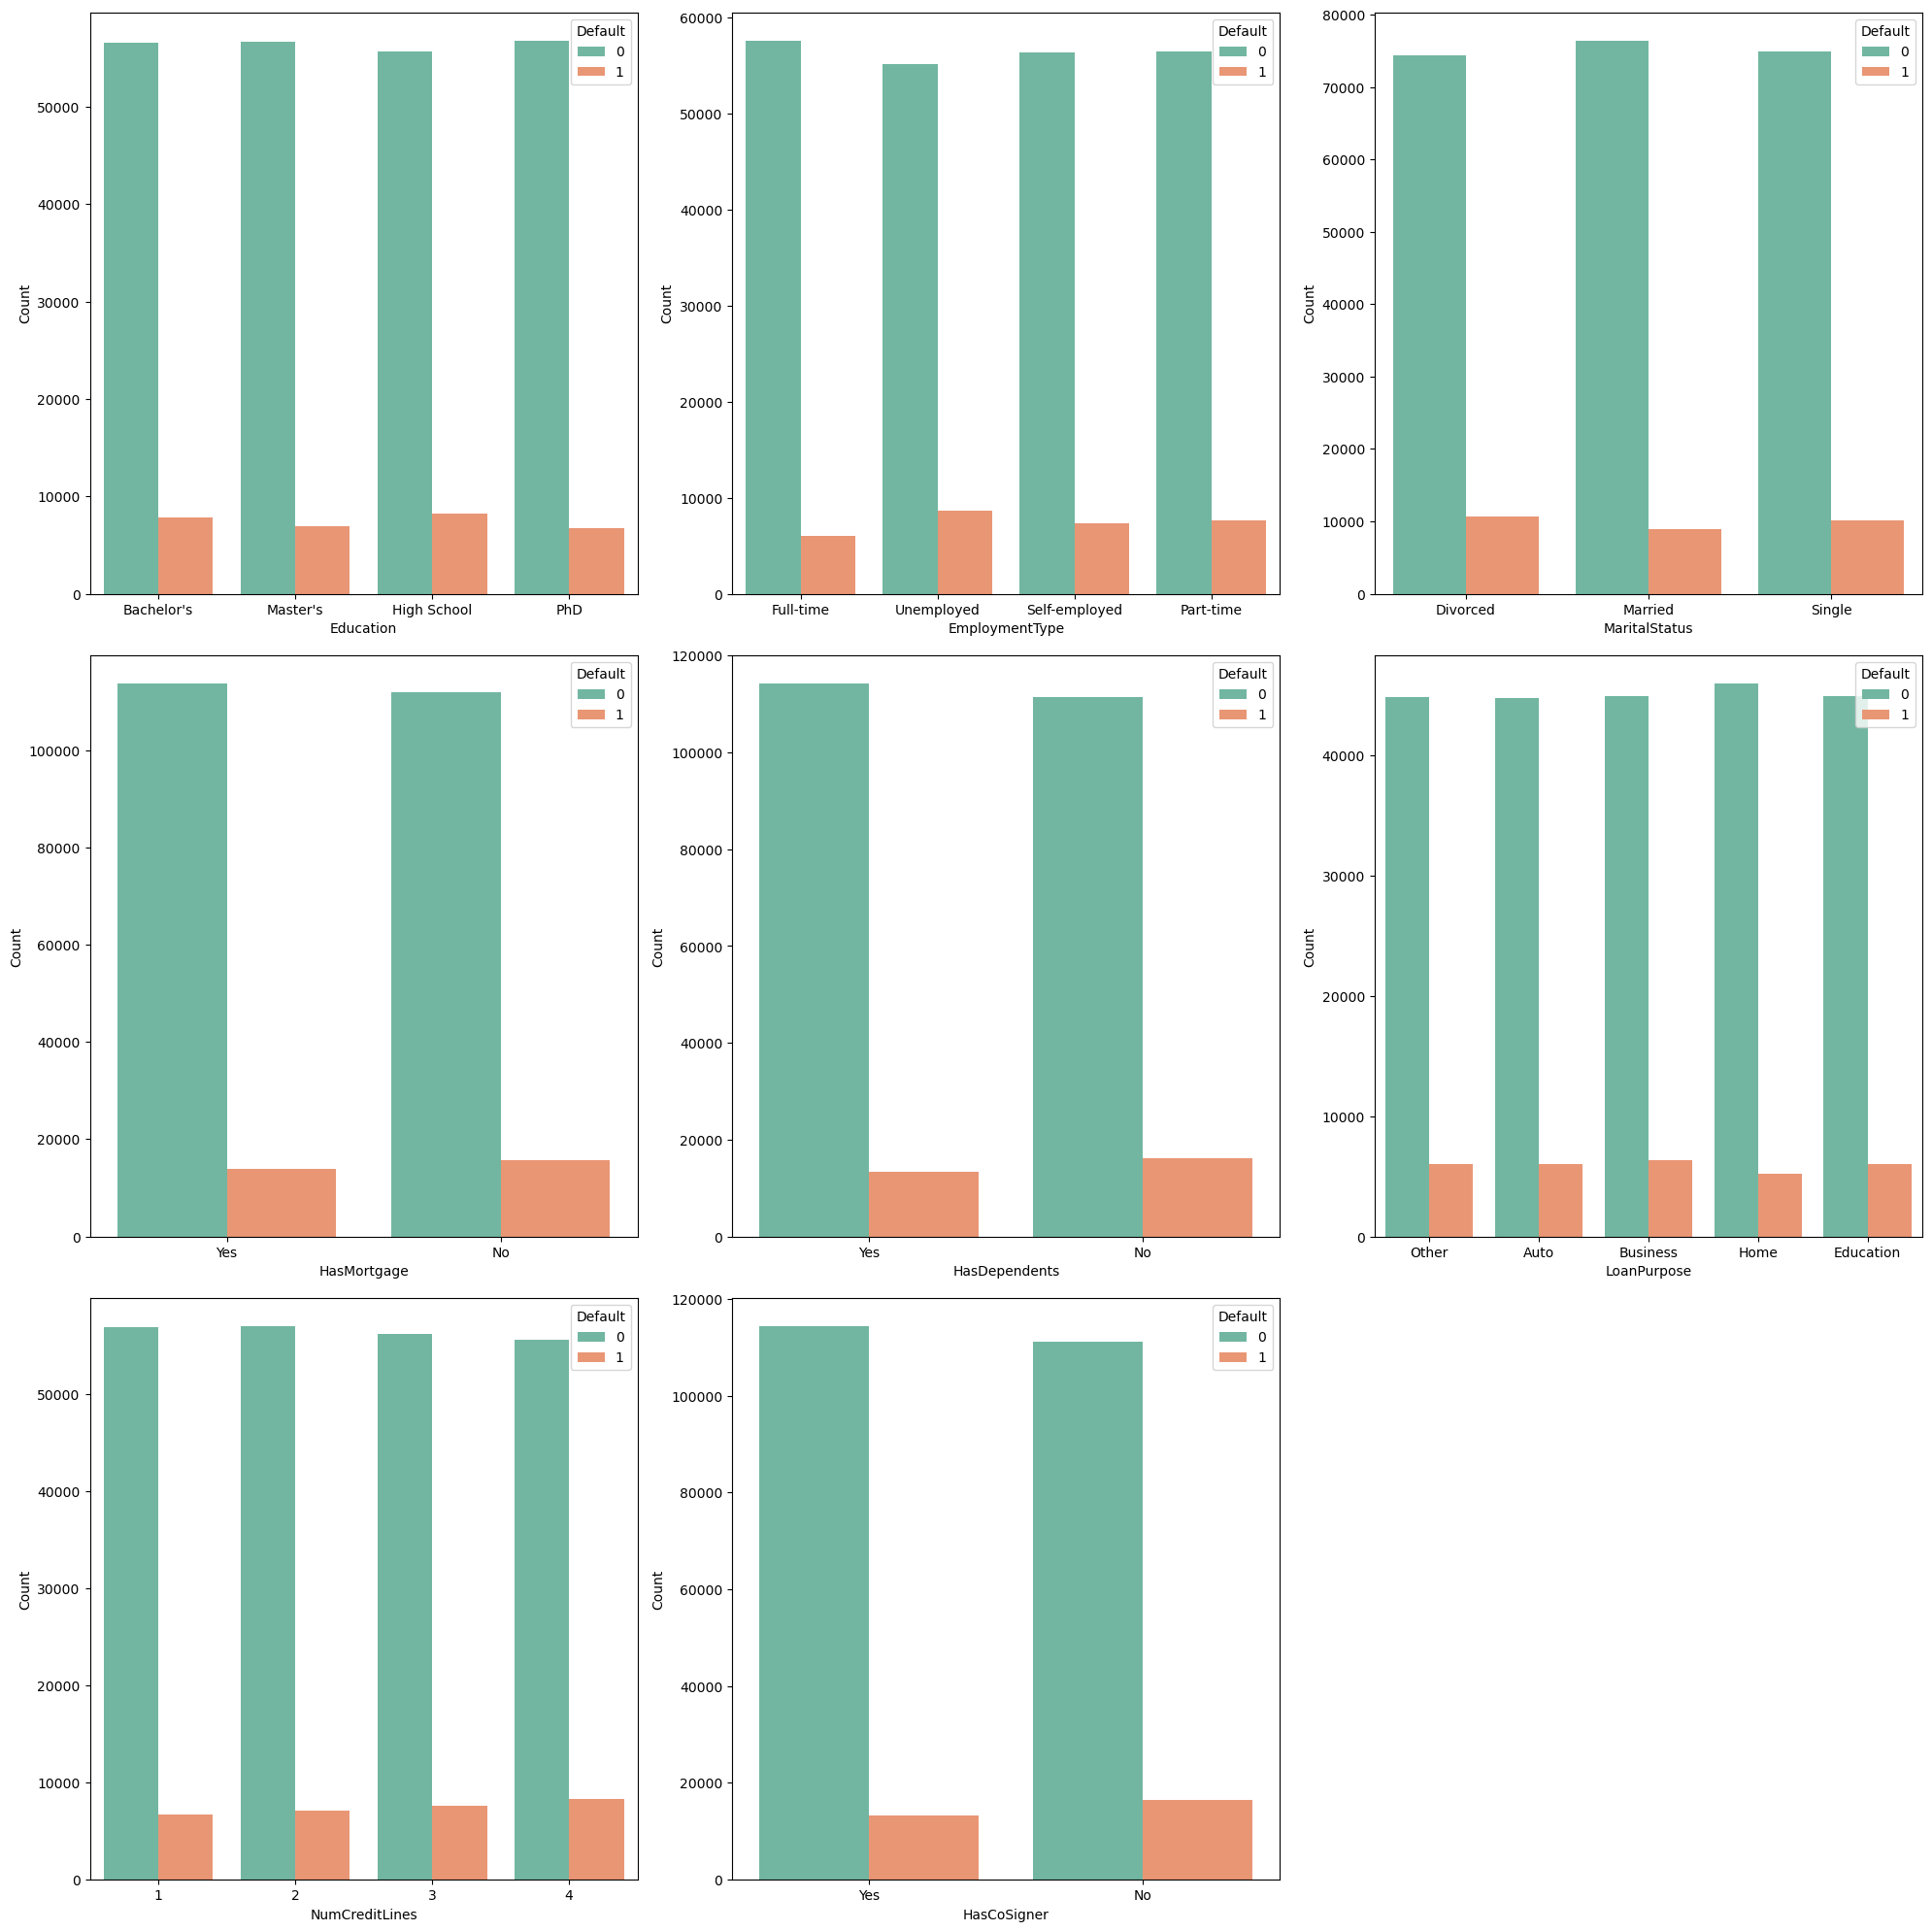

In [11]:
plt.figure(figsize=(20, 20))
ind=1
for variable in categorical_variables[:8]:
    plt.subplot(3,3,ind)
    sns.countplot(x=cluster[variable],palette='Set2',hue=cluster["Default"])
    plt.ylabel('Count')
    plt.xlabel(variable)
    ind+=1
plt.tight_layout()
plt.show()

# Inference :

The target variable classes are almost equally distributed among all categories of feature variables.
It is a good sign Which indicates each and every feature in the dataset are related with the target.

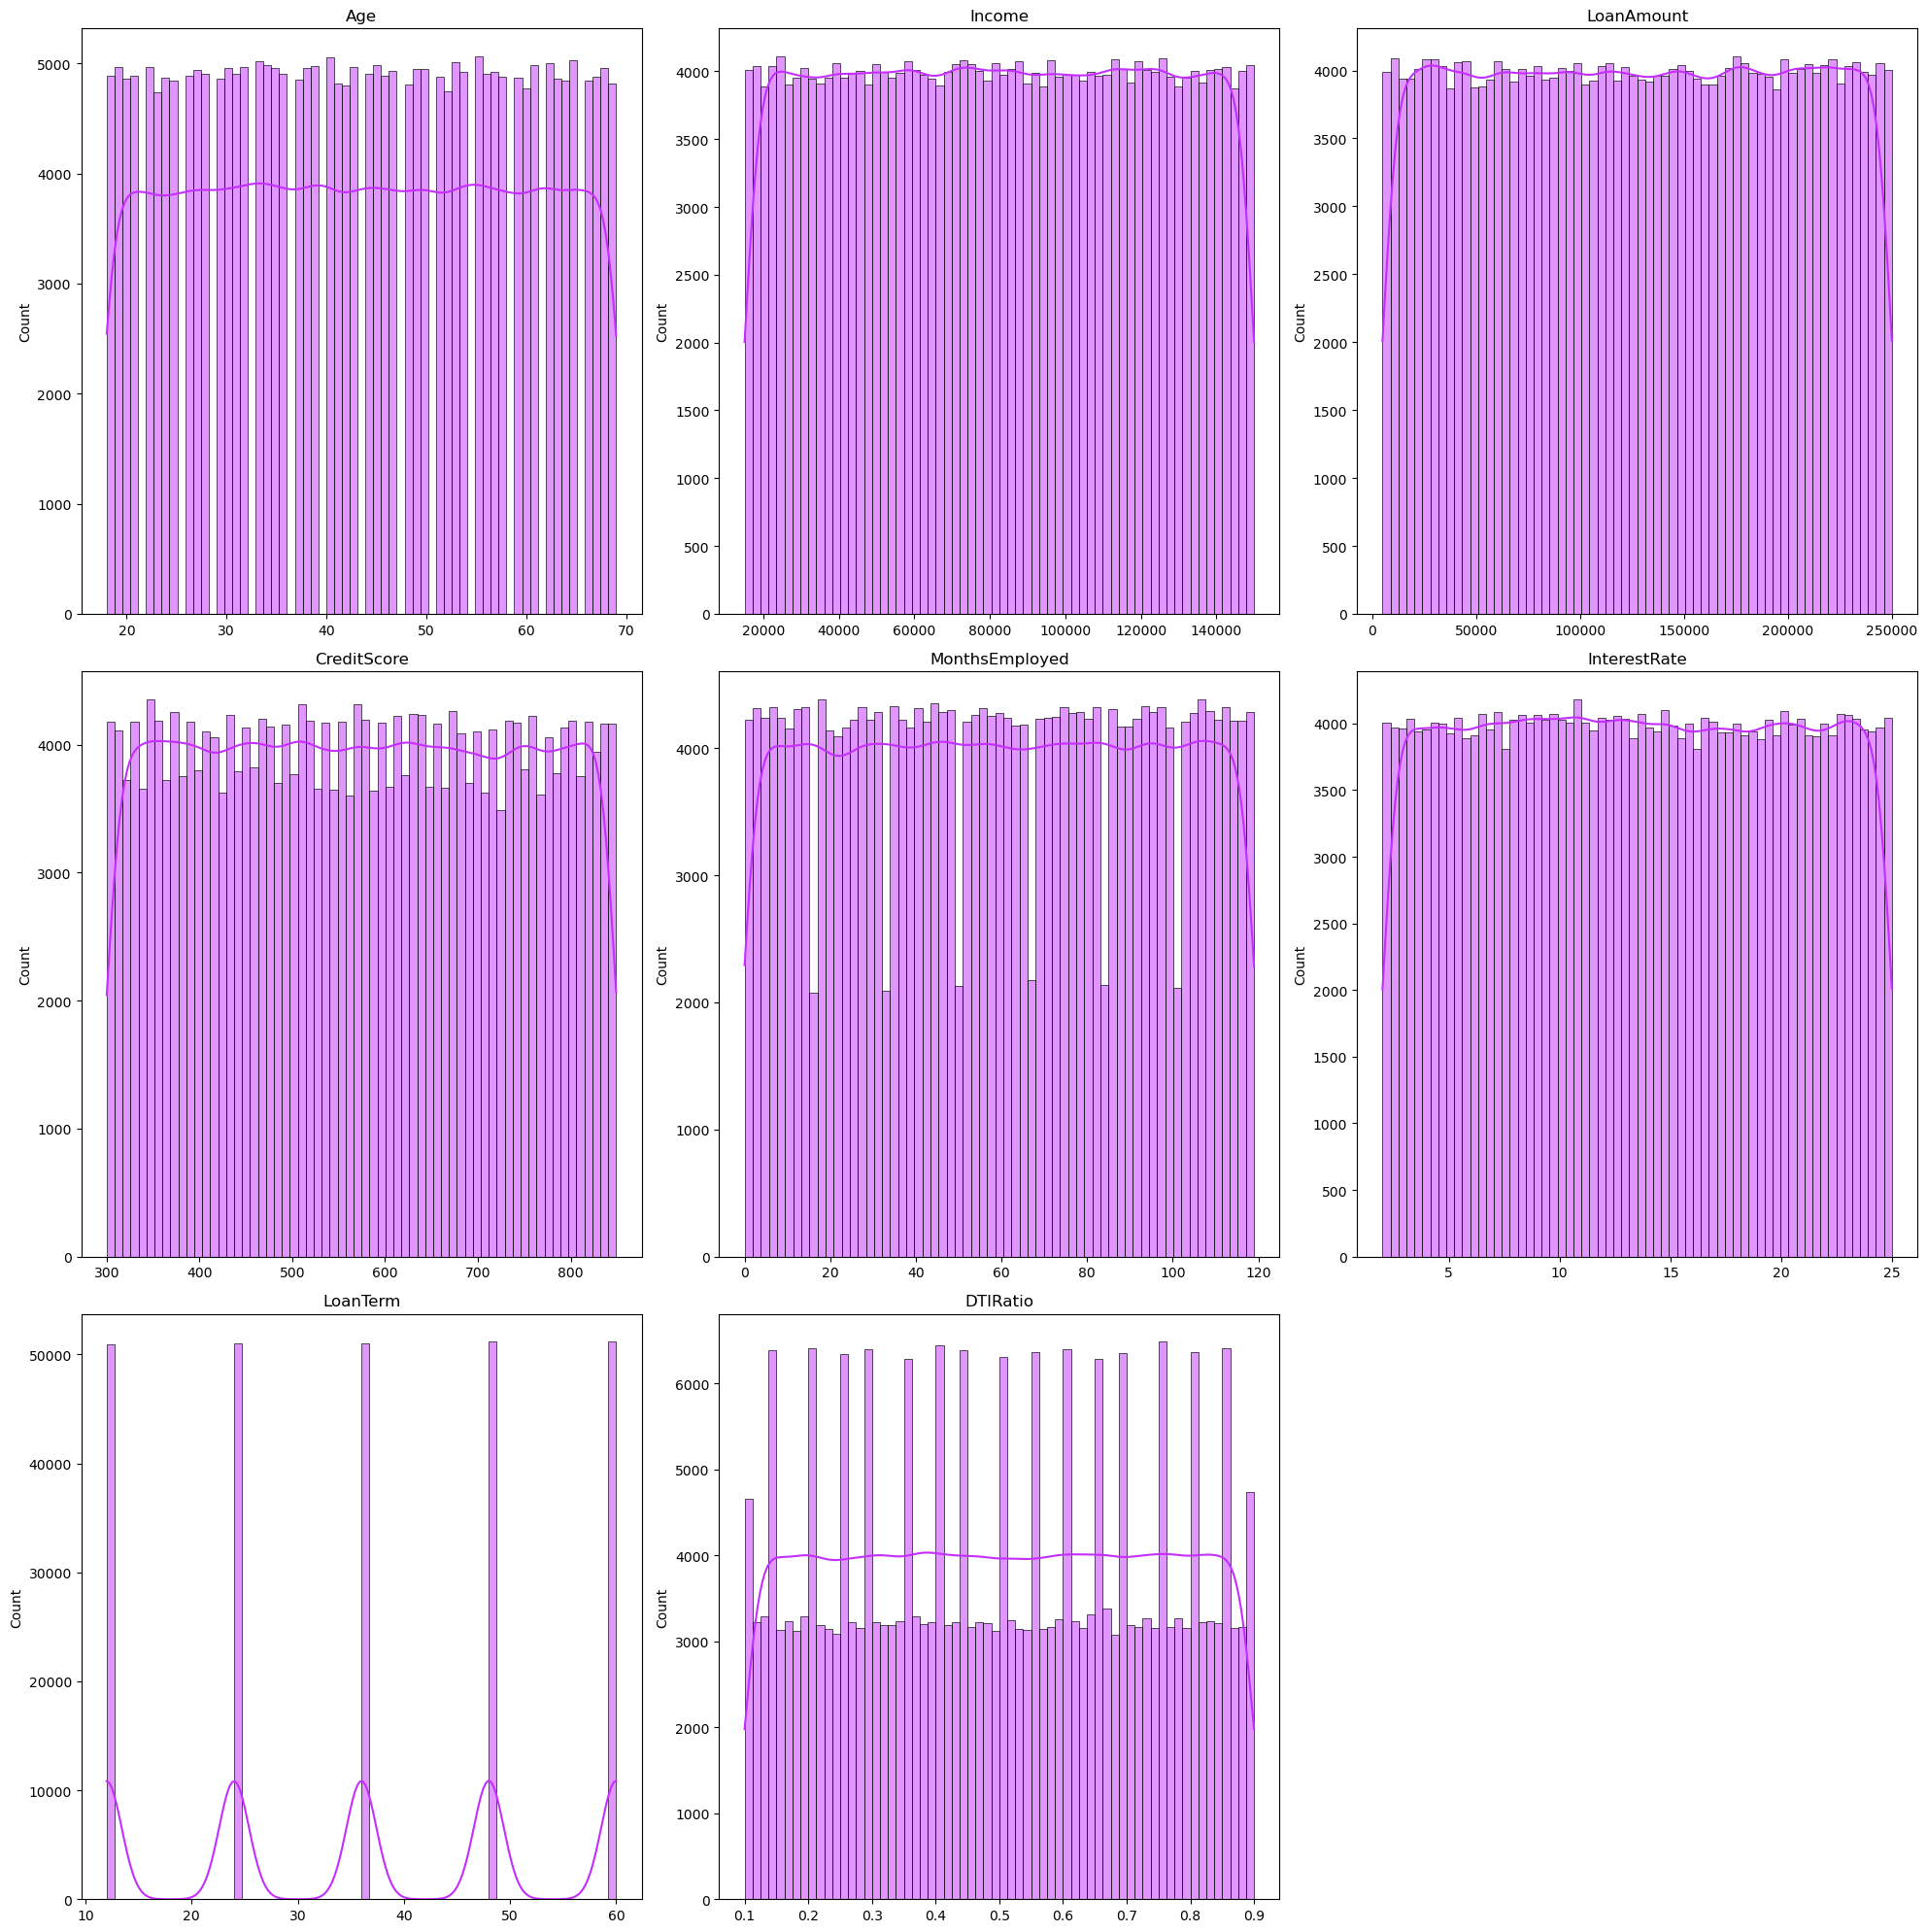

In [12]:
# Numerical Colummns

plt.figure(figsize=(20, 20))
ind=1
for  variable in (numerical_variables):
    plt.subplot(3, 3, ind)
    sns.histplot(x=cluster[variable],kde=True,color="#c42eff")
    plt.title(variable)
    ind+=1
    plt.xlabel('')
plt.tight_layout()
plt.show()

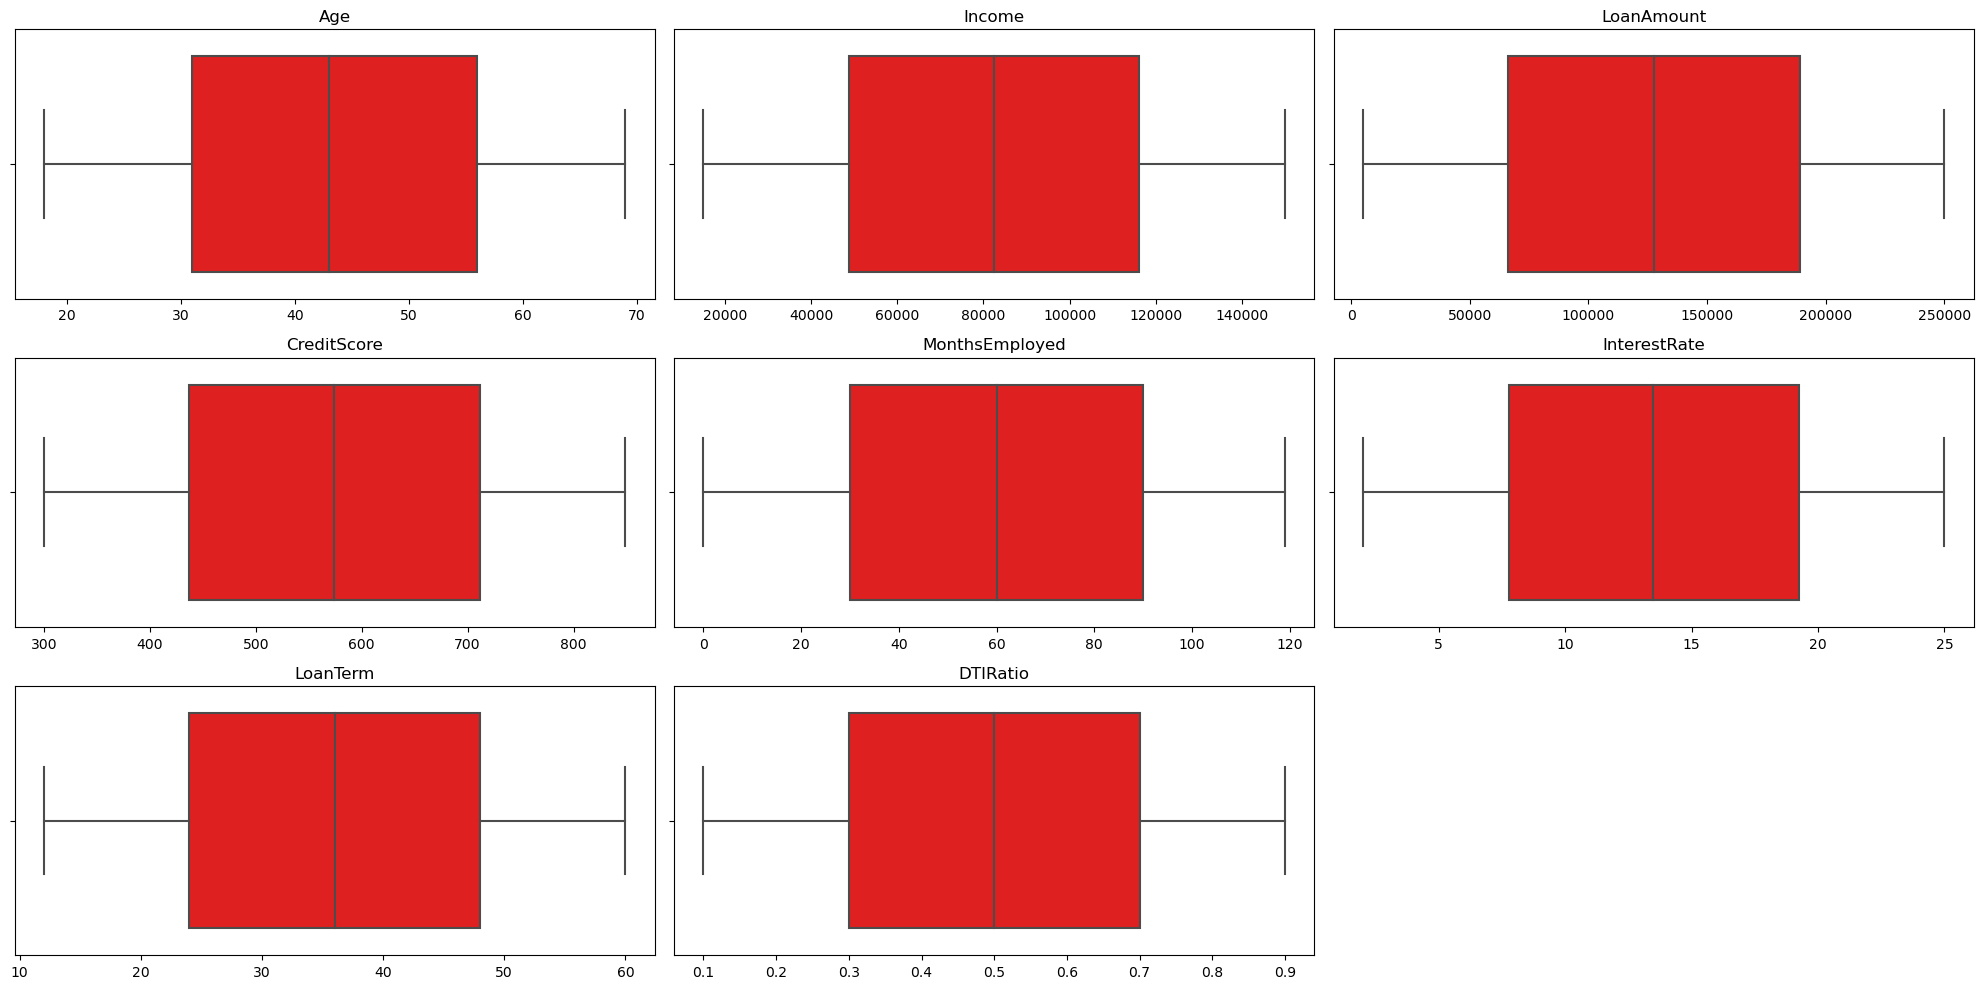

In [13]:
# Checking for Outliers

plt.figure(figsize=(20, 10))
ind=1
for  variable in (numerical_variables):
    plt.subplot(3, 3, ind)
    sns.boxplot(x=cluster[variable],color="red")
    plt.title(variable)
    ind+=1
    plt.xlabel('')
plt.tight_layout()
plt.show()

#  Summmury:

There are no Out liers found 

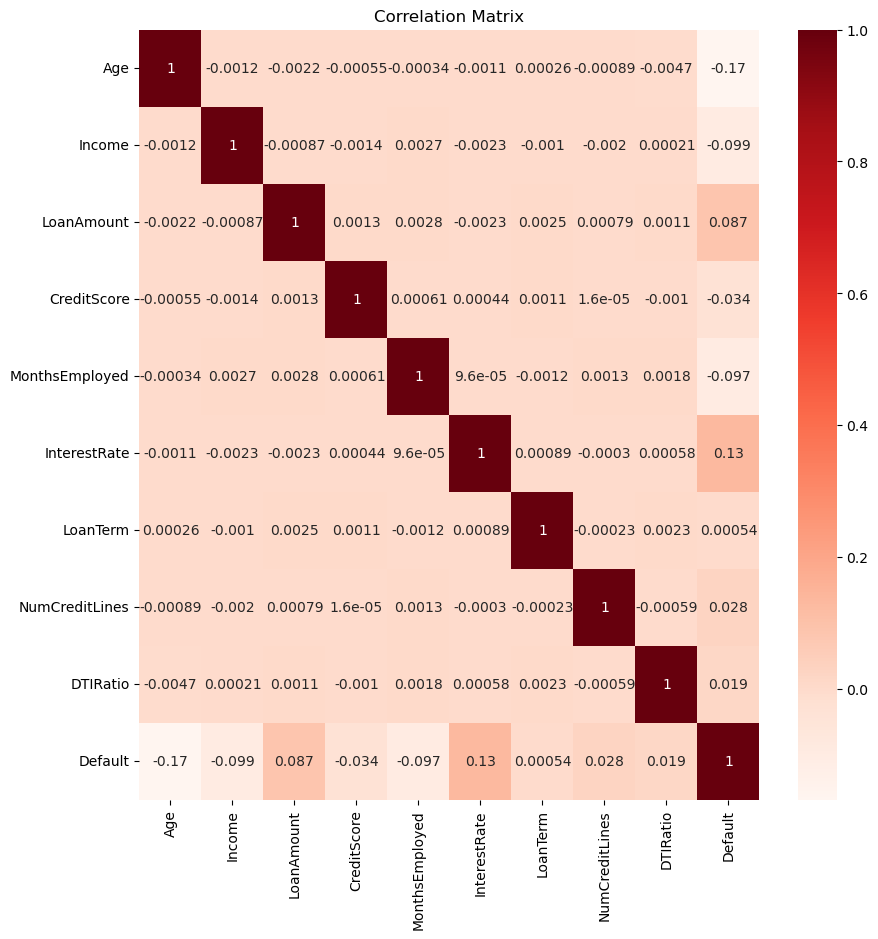

In [14]:
plt.figure(figsize=(10, 10))
sns.heatmap(cluster[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'InterestRate', 'LoanTerm','NumCreditLines' ,'DTIRatio',"Default"]].corr(), annot=True, cmap='Reds')
plt.title('Correlation Matrix')
plt.show()

# In summary:

Default and Interest rate are positively correlated (0.13).

Default and Age are negatively correlated (-0.17).

"Credit Score" is negatively correlated with Loan default.


A positive correlation between Default and Interest Rate suggests that higher interest rates are associated with a higher likelihood of default.

A negative correlation between Default and Age suggests that older individuals tend to have a lower likelihood of default.

A negative correlation between Credit Score and Loan default suggests that higher credit scores are associated with a lower likelihood of default.

In [15]:
# Encode Categorical columns :

from sklearn.preprocessing import OneHotEncoder
df_2=cluster.copy()

In [16]:
columns_to_encode = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

#encoding the categorical data t numerical 
encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(df_2[columns_to_encode])

#collectig the features from the encoded data
encoded_feature_names = encoder.get_feature_names_out(input_features=columns_to_encode)
encoded_df = pd.DataFrame(encoded_columns, columns=encoded_feature_names)


C:\Users\igomp\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
#Dropping the categorical column

df_2.drop(columns=columns_to_encode, inplace=True)

In [18]:
#Concat the dataframes together

df_2 = pd.concat([df_2, encoded_df], axis=1)
df_2.head(4)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,HasMortgage_Yes,HasDependents_No,HasDependents_Yes,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_No,HasCoSigner_Yes
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [19]:
df_2.shape

(255347, 33)

In [20]:
df_2.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,HasMortgage_Yes,HasDependents_No,HasDependents_Yes,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_No,HasCoSigner_Yes
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,...,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128,...,0.500014,0.499732,0.500268,0.199117,0.200895,0.199748,0.200848,0.199391,0.499892,0.500108
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379,...,0.500001,0.500001,0.500001,0.399337,0.400671,0.399812,0.400636,0.399544,0.500001,0.500001
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Customer Segmentation (Clustering):

Grouping customers based on their banking behaviours' Eg: Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines','InterestRate', 'LoanTerm', 'DTIRatio'.

In [21]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd

# Separating features and target variable
X = df_2.drop(columns=['Default', 'LoanID'])  # Exclude LoanID from features
y = df_2['Default']

# Standardizing only numeric features
numeric_cols = X.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Applying SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Applying ensemble clustering with KMeans and DBSCAN
kmeans = KMeans(n_clusters=4, random_state=42)
dbscan = DBSCAN(eps=0.5, min_samples=10)
kmeans_clusters = kmeans.fit_predict(X_resampled)
dbscan_clusters = dbscan.fit_predict(X_resampled)

# Combine cluster assignments using ensemble clustering
ensemble_clusters = (kmeans_clusters + dbscan_clusters) / 2

# Get cluster sizes
cluster_sizes = pd.Series(ensemble_clusters).value_counts().sort_index()

# Adding cluster labels to the DataFrame
X_resampled['Cluster'] = ensemble_clusters

# Printing cluster sizes
print("Cluster Sizes:")
print(cluster_sizes)


C:\Users\igomp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Sizes:
-0.5     110695
 0.0     114125
 0.5     104365
 1.0     120509
 2.5         27
          ...  
 77.0        10
 77.5        10
 78.0        10
 78.5        10
 79.0         7
Name: count, Length: 114, dtype: int64


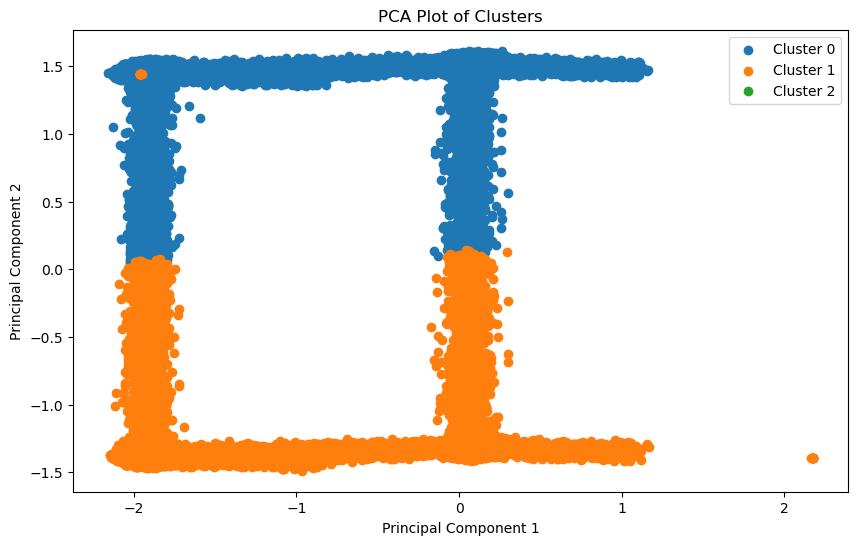

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled.drop(columns=['Cluster']))

# Create scatter plot
plt.figure(figsize=(10, 6))
for cluster in range(3):  # Assuming 3 clusters
    plt.scatter(X_pca[X_resampled['Cluster'] == cluster, 0], 
                X_pca[X_resampled['Cluster'] == cluster, 1],
                label=f'Cluster {cluster}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot of Clusters')
plt.legend()
plt.show()

# 2. Credit Risk Assessment (Classification):

 Develop a robust credit scoring system using classification algorithms to assess
the creditworthiness of loan applicants.

 Utilize historical data to train the model and predict the likelihood of default or late
payments.

 Enhance risk management by integrating machine learning models into the credit
approval process.

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Separating features and target variable
X = df_2.drop(columns=['Default', 'LoanID'])  # Exclude LoanID from features
y = df_2['Default']

# Standardizing only numeric features
numeric_cols = X.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Applying SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85     45127
           1       0.84      0.87      0.85     45151

    accuracy                           0.85     90278
   macro avg       0.85      0.85      0.85     90278
weighted avg       0.85      0.85      0.85     90278



# Summury:

Precision: For class 0 (non-default), the precision is 0.86, indicating that when the model predicts a loan will not default, it is correct approximately 86% of the time. For class 1 (default), the precision is 0.84, suggesting that when the model predicts a loan will default, it is correct around 84% of the time. Both precisions are relatively high, implying that the model has a low rate of false positives.

Recall: For class 0, the recall is 0.83, indicating that the model correctly identifies approximately 83% of non-default loans among the total instances of non-default loans. For class 1, the recall is 0.87, suggesting that the model correctly identifies around 87% of default loans among the total instances of default loans. Both recalls are relatively high, indicating that the model effectively captures instances of both classes.

F1-score: The F1-score, which is the harmonic mean of precision and recall, provides a balanced measure of the model's performance for each class. In this case, the F1-score for both classes is approximately 0.85, indicating good overall performance in terms of both precision and recall.

Support: The support represents the number of actual occurrences of each class in the test set. In this case, the support for both classes is roughly balanced, with approximately 45,000 instances each.

In [39]:
#Prediction:

# Create a sample dataframe with features
sample_data = pd.DataFrame({
    'Age': [35],
    'Income': [50000],
    'LoanAmount': [10000],
    'CreditScore': [700],
    'MonthsEmployed': [24],
    'NumCreditLines': [3],
    'InterestRate': [5],
    'LoanTerm': [36],
    'DTIRatio': [0.4],
    'Education_Bachelor\'s': [0],  # Assuming the borrower does not have a Bachelor's degree
    'Education_High School': [0],  # Assuming the borrower does not have a High School education
    'Education_Master\'s': [0],  # Assuming the borrower does not have a Master's degree
    'Education_PhD': [0],  # Assuming the borrower does not have a PhD
    'EmploymentType_Full-time': [0],  # Assuming the borrower is not full-time employed
    'EmploymentType_Part-time': [0],  # Assuming the borrower is not part-time employed
    'EmploymentType_Self-employed': [0],  # Assuming the borrower is not self-employed
    'EmploymentType_Unemployed': [0],  # Assuming the borrower is not unemployed
    'MaritalStatus_Divorced': [0],  # Assuming the borrower is not divorced
    'MaritalStatus_Married': [0],  # Assuming the borrower is not married
    'MaritalStatus_Single': [1],  # Assuming the borrower is single
    'HasMortgage_No': [1],  # Assuming the borrower does not have a mortgage
    'HasMortgage_Yes': [0],  # Assuming the borrower has a mortgage
    'HasDependents_No': [1],  # Assuming the borrower does not have dependents
    'HasDependents_Yes': [0],  # Assuming the borrower has dependents
    'LoanPurpose_Auto': [0],  # Assuming the loan purpose is not for auto
    'LoanPurpose_Business': [0],  # Assuming the loan purpose is not for business
    'LoanPurpose_Education': [0],  # Assuming the loan purpose is not for education
    'LoanPurpose_Home': [1],  # Assuming the loan purpose is for a home
    'LoanPurpose_Other': [0],  # Assuming the loan purpose is not for other
    'HasCoSigner_No': [1],  # Assuming the loan does not have a co-signer
    'HasCoSigner_Yes': [0]  # Assuming the loan has a co-signer
})

# Make predictions using the trained Decision Tree classifier
predictions = decision_tree.predict(sample_data)

# Display the predictions
print("Predicted Class for the Sample Data:")
for prediction in predictions:
    if prediction == 0:
        print("Non-Default")
    else:
        print("Default")


Predicted Class for the Sample Data:
Default
